Importing the necessary libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
# loading datasets

train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

# Exploratory data analysis of train dataset

In [3]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
train.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


The first observation we can make is that it seems like the null values were replace by 'unknown'

In [5]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
test.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [7]:
# setting 'ID' as index

train.set_index('ID', inplace = True)

In [8]:
test.set_index('ID', inplace = True)

In [9]:
# information on train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 26110 to 14156
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.3+ MB


As we can see here, it showing no missing value, while the observation of the firts and last 5 rows shows 'unknown' values

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 38441 to 34839
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.8+ MB


In [11]:
# checking duplicate on train

train.loc[train.duplicated(),]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


No duplicate on train

In [12]:
# checking unknown on each train column
for i in train.columns:
    print(train.loc[train[i]=='unknown'])
    

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, subscribed]
Index: []
       age      job   marital  education default  balance housing loan  \
ID                                                                       
40576   31  unknown   married  secondary      no        3      no   no   
27845   39  unknown    single    unknown      no        0      no   no   
9734    53  unknown   married  secondary      no       16      no   no   
19070   59  unknown   married    unknown      no     1541      no   no   
21654   40  unknown   married   tertiary      no      119      no   no   
...    ...      ...       ...        ...     ...      ...     ...  ...   
9059    51  unknown    single    unknown      no        0      no   no   
11356   46  unknown   married    primary      no      110      no   no   
355     59  unknown  divorced    unknown      no       27      no   no   
41872  

In [13]:
# checking duplicate on test

test.loc[test.duplicated(),]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


we can see that there are unknown in the columns job, education,contact,poutcome

In [14]:
# let’s check other columns individually to see whether unknown are present

In [15]:
train.loc[train['age']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [16]:
test.loc[test['age']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [17]:
train.loc[train['marital']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [18]:
test.loc[test['marital']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [19]:
train.loc[train['default']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [20]:
test.loc[test['default']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [21]:
train.loc[train['balance']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [22]:
test.loc[test['balance']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [23]:
train.loc[train['housing']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [24]:
test.loc[test['housing']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [25]:
train.loc[train['loan']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [26]:
test.loc[test['loan']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [27]:
train.loc[train['day']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [28]:
test.loc[test['day']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [29]:
train.loc[train['month']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [30]:
test.loc[test['month']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [31]:
train.loc[train['duration']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [32]:
test.loc[test['duration']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [33]:
train.loc[train['campaign']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [34]:
test.loc[test['campaign']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [35]:
train.loc[train['pdays']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [36]:
test.loc[test['pdays']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [37]:
train.loc[train['previous']=='unknown']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,


In [38]:
test.loc[test['previous']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,


In [39]:
# Let’s fill the unknown by NaN in train

train[['job', 'education', 'contact', 'poutcome']] = train[['job', 'education', 'contact', 'poutcome']].replace('unknown', np.nan)

In [40]:
test[['job', 'education', 'contact', 'poutcome']] = test[['job', 'education', 'contact', 'poutcome']].replace('unknown', np.nan)

In [41]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,NaN,no,1933,no,no,telephone,19,nov,44,2,-1,0,NaN,no
40576,31,NaN,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,NaN,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,NaN,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,NaN,no


In [42]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,NaN
40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,NaN
3709,31,self-employed,single,tertiary,no,144,yes,no,NaN,16,may,676,1,-1,0,NaN
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,NaN
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,NaN,3,jul,111,1,-1,0,NaN


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 26110 to 14156
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31441 non-null  object
 2   marital     31647 non-null  object
 3   education   30333 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     22470 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    5718 non-null   object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.3+ MB


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 38441 to 34839
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13482 non-null  object
 2   marital    13564 non-null  object
 3   education  13021 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    9721 non-null   object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   2534 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.8+ MB


we notice that the column poutcome in train and test is 81% filled with missing data

In [45]:
# let’s look into the column poutcome in train to see the trend in unique values

train['poutcome'].value_counts()

failure    3362
other      1288
success    1068
Name: poutcome, dtype: int64

In [46]:
# let’s look into the column poutcome in test to see the trend in unique values

test['poutcome'].value_counts()

failure    1539
other       552
success     443
Name: poutcome, dtype: int64

In [47]:
# checking unique values for other columns containting missing data

In [48]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
Name: job, dtype: int64

In [49]:
test['job'].value_counts()

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
Name: job, dtype: int64

In [50]:
train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
Name: education, dtype: int64

In [51]:
test['education'].value_counts()

secondary    6978
tertiary     4000
primary      2043
Name: education, dtype: int64

In [52]:
train['contact'].value_counts()

cellular     20423
telephone     2047
Name: contact, dtype: int64

In [53]:
test['contact'].value_counts()

cellular     8862
telephone     859
Name: contact, dtype: int64

The above trends don’t give enough guidance on how to fill missing values

# let’s concat train and test for better analysis in understanding more on how to fill NaN, on what are really outlier, etc.

In [54]:
df = pd.concat([train, test], axis=0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,NaN,no,1933,no,no,telephone,19,nov,44,2,-1,0,NaN,no
40576,31,NaN,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,NaN,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,NaN,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,NaN,NaN
11743,54,blue-collar,married,primary,no,2281,yes,no,NaN,20,jun,158,1,-1,0,NaN,NaN
28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,NaN,NaN


In [55]:
# is the mode really dominant in poutcome?
df['poutcome'].value_counts()

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64

we can see that 'failure' has the highest value, and which seems significantly greater than 'other' and 'success'. So, we can say that the mode here is dominant on other classes, and use it to fill NaN

In [56]:
# is the mode really dominant in job?
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

Here the mode is not really dominant (it represents only 21% of total count of unique values, and the gap between the mode, second and third highest counts is not significant). Thus, we cannot say that data in 'job' column follow the trend of the mode. Therefore it is not a good practice to replace NaN by the mode, as this will lead to many inaccurate values.

In [57]:
# calculating potential data loss if we remove NaN in 'job' column
n = df['job'].value_counts().sum()

print('data lost percentage if NaN removed in job column: ', (df.shape[0]-n)/df.shape[0]*100)

data lost percentage if NaN removed in job column:  0.6370131162770122


Data loss (0.6%) is not bad, so we can remove NaN from job column, in train dataset

In [58]:
# is the mode really dominant in education?
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [59]:
m = df['education'].value_counts().sum()
print('data lost percentage if NaN removed in education column: ', (df.shape[0]-m)/df.shape[0]*100)

data lost percentage if NaN removed in education column:  4.1074074893278185


Here, the mode seems to have a significant highest count in the overall data. But the difference seems not significant in test dataset. So, we will replace or remove NaN in education accordingly  

In [60]:
# is the mode really dominant in contact?
df['contact'].value_counts()

cellular     29285
telephone     2906
Name: contact, dtype: int64

Here, the mode has a significant highest count. It will be used to fill Nan

In [61]:
# checking data types
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [62]:
# checking whether any of the integer columns should be considered float

df[['age','balance','day','duration','campaign','pdays','previous']].nunique()

age           77
balance     7168
day           31
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

The number of unique values for all the integer columns are very less than the total number of entries/rows. So, they will be kept as integer

In [63]:
# summary statistics of df

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


We suspect outliers in df

In [64]:
# cross-checking outliers

col_num = ['age','balance','day','duration','campaign','pdays','previous']

def box(columns, data, a, b, c, d):
    plt.figure(figsize = (15, 7), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.boxplot(data[i], palette = 'colorblind')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()


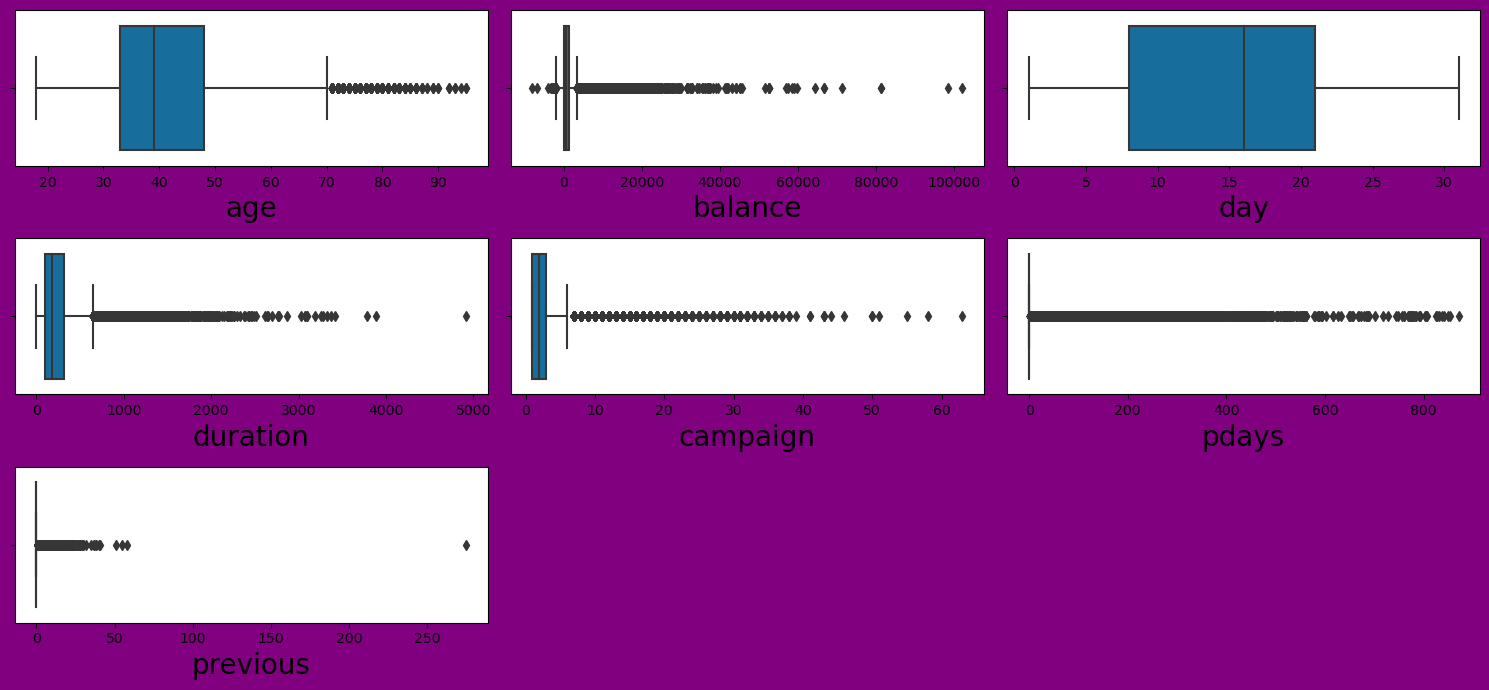

In [65]:
box(col_num, df, 7, 3, 3, 20)

all integer columns contain outliers except 'day'

In [66]:
# removing outliers from train 

col = df[['age','balance','day','duration','campaign','pdays','previous']]

from scipy.stats import zscore
    
z = np.abs(zscore(col))

z

,age,balance,day,duration,campaign,pdays,previous
ID,,,,,,,
26110,1.418617,0.187448,0.383734,0.831621,0.246560,0.411453,0.251940
40576,0.935732,0.446434,0.503892,0.649114,0.246560,0.411453,0.251940
15320,1.312428,0.154783,0.263576,0.070529,0.569351,0.411453,0.251940
43962,1.512791,0.632150,0.744208,2.364186,0.569351,0.437463,1.050473
29842,0.935732,0.408335,1.418634,0.473107,0.569351,0.411453,0.251940
...,...,...,...,...,...,...,...
23465,0.182341,0.432640,1.465155,0.427776,0.399020,0.411453,0.251940
11743,1.230269,0.301743,0.503892,0.388945,0.569351,0.411453,0.251940
28292,0.559037,0.353815,1.585313,0.474374,0.569351,0.411453,0.251940


In [67]:
# removing outlier from train
train_1 = train[(z<3).all(axis = 1)]

In [68]:
print('data lost percentage is: ', (train.shape[0]-train_1.shape[0])/train.shape[0]*100)

data lost percentage is:  10.989983252756975


In [69]:
# removing outlier from test
test_1 = test[(z<3).all(axis = 1)]

In [70]:
print('data lost percentage is: ', (test.shape[0]-test_1.shape[0])/test.shape[0]*100)

data lost percentage is:  11.235623709820112


In [71]:
# removing outliers using IQR on df

col = df[['age','balance','day','duration','campaign','pdays','previous']]


Q1 = col.quantile(0.25)

Q3 = col.quantile(0.75)

IQR = Q3-Q1

x = Q1-1.5*IQR
y = Q3+1.5*IQR

In [72]:
# removing outliers from train
train_2 = train[~((train > y) | (train < x)).any(axis = 1)]

In [73]:
print('data lost percentage is: ', (train.shape[0]-train_2.shape[0])/train.shape[0]*100)

data lost percentage is:  37.40006951685784


In [74]:
# removing outliers from train
test_2 = test[~((test > y) | (test < x)).any(axis = 1)]

In [75]:
print('data lost percentage is: ', (test.shape[0]-test_2.shape[0])/test.shape[0]*100)

data lost percentage is:  38.20406959598938


zscore give less data loss. But, the data lost is above 10% which not good

In [76]:
# let's increase zscore a bit to bring down data loss

In [77]:
train_3 = train[(z<3.3).all(axis = 1)]

In [78]:
print('data lost percentage is: ', (train.shape[0]-train_3.shape[0])/train.shape[0]*100)

data lost percentage is:  7.1697159288400165


In [79]:
test_3 = test[(z<3.3).all(axis = 1)]

In [80]:
print('data lost percentage is: ', (test.shape[0]-test_3.shape[0])/test.shape[0]*100)

data lost percentage is:  7.062813329401356


Data loss of 7% is acceptable

In [81]:
train=train_3

In [82]:
test = test_3

In [83]:
# filling missing values

In [84]:
train['education'] = train['education'].fillna(train['education'].mode()[0])

In [85]:
test['education'] = test['education'].fillna(test['education'].mode()[0])

In [86]:
train['contact'] = train['contact'].fillna(train['contact'].mode()[0])

In [87]:
test['contact'] = test['contact'].fillna(test['contact'].mode()[0])

In [88]:
train['poutcome'] = train['poutcome'].fillna(train['poutcome'].mode()[0])

In [89]:
test['poutcome'] = test['poutcome'].fillna(test['poutcome'].mode()[0])

In [90]:
train.dropna(subset = ['job'], inplace = True)

In [91]:
test.dropna(subset = ['job'], inplace = True)

In [92]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,secondary,no,1933,no,no,telephone,19,nov,44,2,-1,0,failure,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,failure,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,failure,no
29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12109,43,management,single,secondary,no,2968,no,no,cellular,20,jun,30,4,-1,0,failure,no
9476,37,technician,single,tertiary,no,1309,no,no,cellular,6,jun,442,2,-1,0,failure,no
36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,failure,no


In [93]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,failure
3709,31,self-employed,single,tertiary,no,144,yes,no,cellular,16,may,676,1,-1,0,failure
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,failure
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,cellular,3,jul,111,1,-1,0,failure
16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,failure
11743,54,blue-collar,married,primary,no,2281,yes,no,cellular,20,jun,158,1,-1,0,failure
28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,failure


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29192 entries, 26110 to 19710
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         29192 non-null  int64 
 1   job         29192 non-null  object
 2   marital     29192 non-null  object
 3   education   29192 non-null  object
 4   default     29192 non-null  object
 5   balance     29192 non-null  int64 
 6   housing     29192 non-null  object
 7   loan        29192 non-null  object
 8   contact     29192 non-null  object
 9   day         29192 non-null  int64 
 10  month       29192 non-null  object
 11  duration    29192 non-null  int64 
 12  campaign    29192 non-null  int64 
 13  pdays       29192 non-null  int64 
 14  previous    29192 non-null  int64 
 15  poutcome    29192 non-null  object
 16  subscribed  29192 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.0+ MB


In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12531 entries, 38441 to 34839
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        12531 non-null  int64 
 1   job        12531 non-null  object
 2   marital    12531 non-null  object
 3   education  12531 non-null  object
 4   default    12531 non-null  object
 5   balance    12531 non-null  int64 
 6   housing    12531 non-null  object
 7   loan       12531 non-null  object
 8   contact    12531 non-null  object
 9   day        12531 non-null  int64 
 10  month      12531 non-null  object
 11  duration   12531 non-null  int64 
 12  campaign   12531 non-null  int64 
 13  pdays      12531 non-null  int64 
 14  previous   12531 non-null  int64 
 15  poutcome   12531 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.6+ MB


Now we confirm there is no missing data in any of train and test

In [96]:
# checking the skwness

In [97]:

col_num = ['age','balance','day','duration','campaign','pdays','previous']

def distplot(columns, data, k, t, a, b, c, d):
    plt.figure(figsize = (k, t), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.distplot(data[i], color = 'r')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()
            

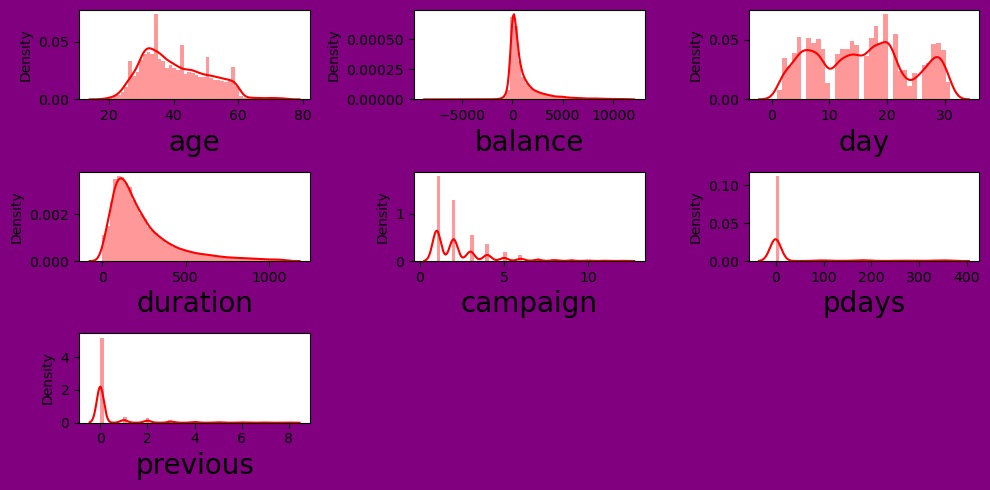

In [98]:
distplot(col_num,train, 10, 5, 7, 3, 3, 20)

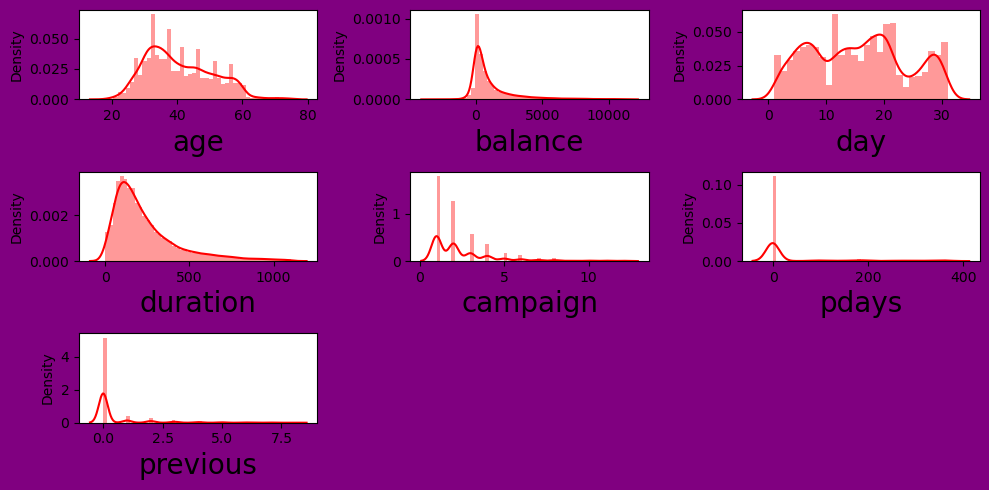

In [99]:
distplot(col_num,test, 10, 5, 7, 3, 3, 20)

only the columns 'age' and 'day' look like normal

In [100]:
train.skew()

age         0.499743
balance     2.557258
day         0.096544
duration    1.693940
campaign    2.076362
pdays       2.491262
previous    3.465304
dtype: float64

In [101]:
test.skew()

age         0.488118
balance     2.591516
day         0.121836
duration    1.680015
campaign    2.110463
pdays       2.404295
previous    3.434746
dtype: float64

we confirm that 'age' and 'day' are normally distributed 

In [102]:
# let’s remove skewness from the remaining columns 

In [103]:
# here we use cbrt method and boxcox method as it can take both positive and negative values
from scipy import stats
train['balance'] = np.cbrt(train['balance'])
train['duration'] = np.cbrt(train['duration'])
train['campaign'] = stats.boxcox(train['campaign'])[0]
train['pdays'] = np.cbrt(train['pdays'])
train['previous'] = np.cbrt(train['previous'])


In [104]:

test['balance'] = np.cbrt(test['balance'])
test['duration'] = np.cbrt(test['duration'])
test['campaign'] = stats.boxcox(test['campaign'])[0]
test['pdays'] = np.cbrt(test['pdays'])
test['previous'] = np.cbrt(test['previous'])

In [105]:
train.skew()

age         0.499743
balance    -0.414933
day         0.096544
duration    0.352047
campaign    0.149460
pdays       1.877676
previous    1.990941
dtype: float64

In [106]:
test.skew()

age         0.488118
balance    -0.390672
day         0.121836
duration    0.326700
campaign    0.152536
pdays       1.816519
previous    1.943524
dtype: float64

there is still skewness in pdays'and 'previous' in both train 

In [107]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,29192.000000,29192.000000,29192.000000,29192.000000,29192.000000,29192.000000,29192.000000
mean,40.623938,7.150640,15.754488,5.794030,0.483305,0.144623,0.219707
std,10.181353,6.240840,8.315132,1.587355,0.432946,2.579827,0.500765
min,18.000000,-20.015821,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,33.000000,4.061548,8.000000,4.702669,0.000000,-1.000000,0.000000
50%,39.000000,7.547842,16.000000,5.635741,0.579745,-1.000000,0.000000
75%,48.000000,11.044585,21.000000,6.760614,0.832025,-1.000000,0.000000
max,75.000000,22.497613,31.000000,10.344652,1.378818,7.179054,2.000000


In [108]:
test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,12531.000000,12531.000000,12531.000000,12531.000000,12531.000000,12531.000000,12531.000000
mean,40.666746,7.146052,15.624132,5.778368,0.484997,0.193132,0.228354
std,10.198369,6.195890,8.240275,1.601546,0.435446,2.631694,0.510370
min,18.000000,-14.907580,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,33.000000,4.041240,8.000000,4.687548,0.000000,-1.000000,0.000000
50%,39.000000,7.506661,16.000000,5.625226,0.579243,-1.000000,0.000000
75%,48.000000,10.991729,21.000000,6.760614,0.830927,-1.000000,0.000000
max,75.000000,22.500247,31.000000,10.341536,1.375242,7.179054,2.000000


''balance' and pdays' contain negative value and 'previous' contains zero values, so we can neither use boxcox nor logtransformer on these columns

In [109]:
# can we remove the negative values from 'balance' and 'pdays' and zero values from 'previous'?

In [110]:
# highlighting the rows where 'balance' is negative
train.loc[train['balance']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
30180,35,blue-collar,married,secondary,no,-5.325074,yes,no,cellular,5,feb,4.578857,0.579745,-1.0,0.0,failure,no
8653,31,management,single,tertiary,no,-5.896369,yes,no,cellular,3,jun,3.825862,1.378818,-1.0,0.0,failure,no
1352,46,blue-collar,married,primary,no,-9.157714,yes,no,cellular,8,may,5.788960,0.832025,-1.0,0.0,failure,no
6216,58,management,divorced,tertiary,no,-4.140818,no,no,cellular,27,may,4.848808,0.000000,-1.0,0.0,failure,no
35015,36,technician,married,secondary,no,-4.272659,yes,no,cellular,6,may,7.020349,0.000000,-1.0,0.0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,39,blue-collar,married,secondary,yes,-7.013579,yes,no,cellular,7,may,4.101566,0.000000,-1.0,0.0,failure,no
15161,31,services,married,secondary,no,-3.107233,yes,yes,cellular,17,jul,9.298624,0.579745,-1.0,0.0,failure,no
8778,21,blue-collar,single,secondary,yes,-3.892996,yes,yes,cellular,4,jun,4.362071,0.000000,-1.0,0.0,failure,no


In [111]:
test.loc[test['balance']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
12527,45,blue-collar,divorced,secondary,no,-8.900130,no,yes,cellular,3,jul,4.805896,0.000000,-1.000000,0.0,failure
21170,51,management,married,tertiary,no,-9.626202,yes,yes,cellular,14,aug,6.282761,0.579243,-1.000000,0.0,failure
17887,26,admin.,single,secondary,yes,-3.476027,no,yes,cellular,30,jul,6.731315,0.830927,-1.000000,0.0,failure
6778,40,admin.,divorced,secondary,no,-8.148276,yes,yes,cellular,28,may,6.463304,0.979162,-1.000000,0.0,failure
5903,34,blue-collar,divorced,secondary,no,-8.271904,yes,no,cellular,26,may,6.282761,0.579243,-1.000000,0.0,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37441,50,technician,divorced,secondary,no,-3.779763,yes,yes,cellular,13,may,8.870576,0.579243,6.634287,1.0,failure
27677,45,entrepreneur,married,secondary,no,-6.415069,no,no,cellular,21,nov,4.396830,0.579243,-1.000000,0.0,failure
5367,32,self-employed,married,primary,no,-1.817121,no,no,cellular,23,may,9.586468,0.579243,-1.000000,0.0,failure


- We can see that 'balance' is almost completely made of negative values. So we cannot remove those value because they will remove almost all the data
- as long as it seems not possible to remove skewness fro 'balance', we will drop this column

In [112]:
# highlighting the rows where 'pdays' is negative
train.loc[train['pdays']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,secondary,no,12.456918,no,no,telephone,19,nov,3.530348,0.579745,-1.0,0.0,failure,no
15320,27,services,married,secondary,no,9.622603,yes,no,cellular,18,jul,6.214465,0.000000,-1.0,0.0,failure,no
29842,31,technician,married,secondary,no,4.918685,yes,no,cellular,4,feb,7.243156,0.000000,-1.0,0.0,failure,no
29390,33,management,single,tertiary,no,0.000000,yes,no,cellular,2,feb,4.876999,0.832025,-1.0,0.0,failure,no
40444,56,retired,married,secondary,no,10.144567,no,no,telephone,3,jul,7.067377,0.579745,-1.0,0.0,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12109,43,management,single,secondary,no,14.371032,no,no,cellular,20,jun,3.107233,0.980749,-1.0,0.0,failure,no
9476,37,technician,single,tertiary,no,10.939057,no,no,cellular,6,jun,7.617412,0.579745,-1.0,0.0,failure,no
36483,29,management,single,tertiary,no,0.000000,yes,no,cellular,12,may,4.876999,0.579745,-1.0,0.0,failure,no


In [113]:
test.loc[test['pdays']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,4.904868,yes,no,cellular,15,may,2.714418,1.152928,-1.0,0.0,failure
3709,31,self-employed,single,tertiary,no,5.241483,yes,no,cellular,16,may,8.776383,0.000000,-1.0,0.0,failure
37422,57,services,single,primary,no,15.573360,yes,no,telephone,13,may,4.020726,0.579243,-1.0,0.0,failure
12527,45,blue-collar,divorced,secondary,no,-8.900130,no,yes,cellular,3,jul,4.805896,0.000000,-1.0,0.0,failure
16013,32,management,single,tertiary,no,0.000000,yes,no,cellular,22,jul,7.691372,0.579243,-1.0,0.0,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,30,services,single,secondary,no,-5.582770,yes,no,cellular,7,may,4.834588,0.000000,-1.0,0.0,failure
35237,32,technician,single,secondary,no,5.052774,yes,no,cellular,7,may,5.972093,0.000000,-1.0,0.0,failure
23465,39,management,married,tertiary,no,3.556893,no,no,cellular,28,aug,5.289572,0.979162,-1.0,0.0,failure


- We can see that 'pdays' is almost completely made of negative values. So we cannot remove those value because they will remove almost all the data
- as long as it seems not possible to remove skewness fro 'pdays', we will drop this column

In [114]:
train.loc[train['previous']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,secondary,no,12.456918,no,no,telephone,19,nov,3.530348,0.579745,-1.0,0.0,failure,no
15320,27,services,married,secondary,no,9.622603,yes,no,cellular,18,jul,6.214465,0.000000,-1.0,0.0,failure,no
29842,31,technician,married,secondary,no,4.918685,yes,no,cellular,4,feb,7.243156,0.000000,-1.0,0.0,failure,no
29390,33,management,single,tertiary,no,0.000000,yes,no,cellular,2,feb,4.876999,0.832025,-1.0,0.0,failure,no
40444,56,retired,married,secondary,no,10.144567,no,no,telephone,3,jul,7.067377,0.579745,-1.0,0.0,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12109,43,management,single,secondary,no,14.371032,no,no,cellular,20,jun,3.107233,0.980749,-1.0,0.0,failure,no
9476,37,technician,single,tertiary,no,10.939057,no,no,cellular,6,jun,7.617412,0.579745,-1.0,0.0,failure,no
36483,29,management,single,tertiary,no,0.000000,yes,no,cellular,12,may,4.876999,0.579745,-1.0,0.0,failure,no


In [115]:
test.loc[test['previous']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,4.904868,yes,no,cellular,15,may,2.714418,1.152928,-1.0,0.0,failure
3709,31,self-employed,single,tertiary,no,5.241483,yes,no,cellular,16,may,8.776383,0.000000,-1.0,0.0,failure
37422,57,services,single,primary,no,15.573360,yes,no,telephone,13,may,4.020726,0.579243,-1.0,0.0,failure
12527,45,blue-collar,divorced,secondary,no,-8.900130,no,yes,cellular,3,jul,4.805896,0.000000,-1.0,0.0,failure
16013,32,management,single,tertiary,no,0.000000,yes,no,cellular,22,jul,7.691372,0.579243,-1.0,0.0,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,30,services,single,secondary,no,-5.582770,yes,no,cellular,7,may,4.834588,0.000000,-1.0,0.0,failure
35237,32,technician,single,secondary,no,5.052774,yes,no,cellular,7,may,5.972093,0.000000,-1.0,0.0,failure
23465,39,management,married,tertiary,no,3.556893,no,no,cellular,28,aug,5.289572,0.979162,-1.0,0.0,failure


- We can see that 'previous' is almost completely made of zero values. So we cannot remove those value because they will remove almost all the data
- as long as it seems not possible to remove skewness fro 'previous', we will drop this column.

In [116]:
# dropping columns

train.drop(['balance','pdays', 'previous'], axis =1, inplace = True)

In [117]:
test.drop(['balance','pdays', 'previous'], axis =1, inplace = True)

In [118]:
train.skew()

age         0.499743
day         0.096544
duration    0.352047
campaign    0.149460
dtype: float64

In [119]:
test.skew()

age         0.488118
day         0.121836
duration    0.326700
campaign    0.152536
dtype: float64

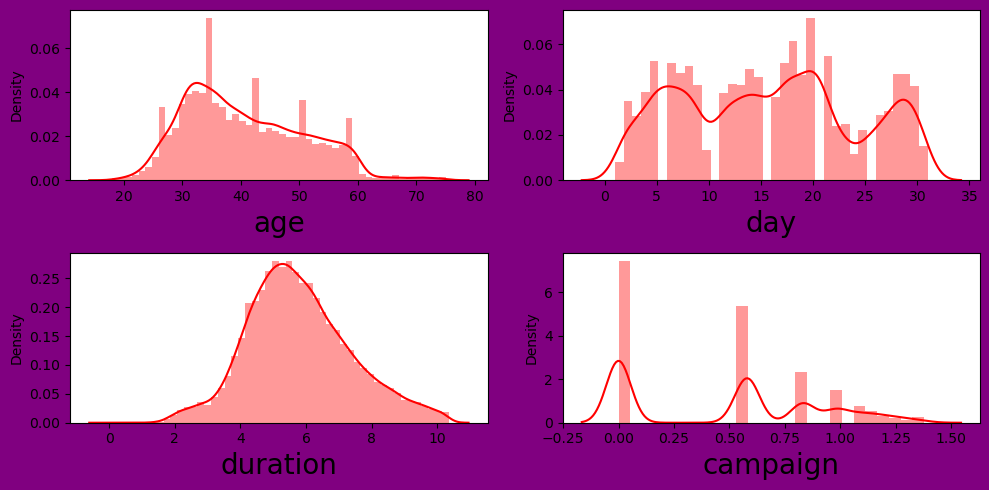

In [120]:
col_num = ['age','day','duration','campaign']
distplot(col_num,train, 10, 5, 4, 2, 2, 20)

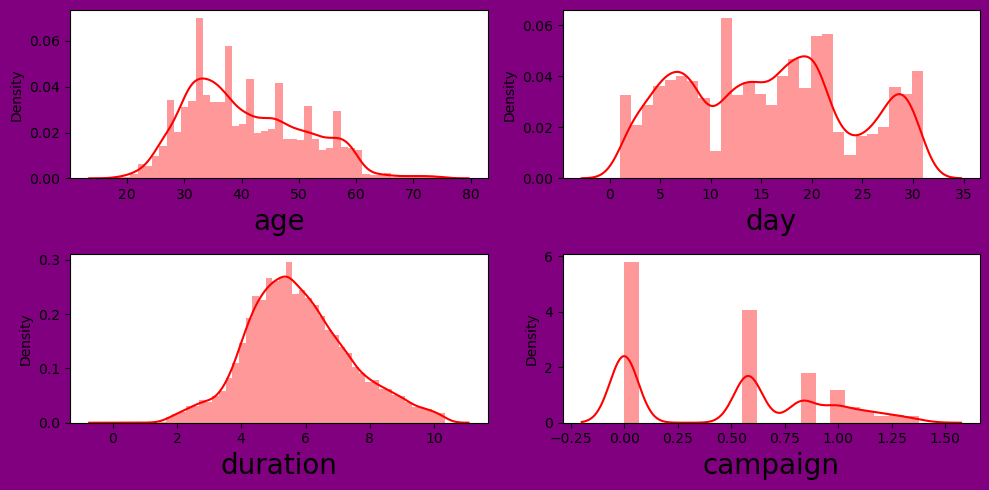

In [121]:
distplot(col_num,test, 10, 5, 4, 2, 2, 20)

In [122]:
# encoding train

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in train.columns:
    if train[i].dtypes == 'object':
        train[i]= enc.fit_transform(train[i].values.reshape(-1,1))

In [123]:
# encoding test

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in test.columns:
    if test[i].dtypes == 'object':
        test[i]= enc.fit_transform(test[i].values.reshape(-1,1))

In [124]:
train

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
ID,,,,,,,,,,,,,,
26110,56,0.0,1.0,1.0,0.0,0.0,0.0,1.0,19,9.0,3.530348,0.579745,0.0,0.0
15320,27,7.0,1.0,1.0,0.0,1.0,0.0,0.0,18,5.0,6.214465,0.000000,0.0,0.0
43962,57,4.0,0.0,2.0,0.0,0.0,0.0,0.0,22,6.0,9.535417,0.000000,2.0,1.0
29842,31,9.0,1.0,1.0,0.0,1.0,0.0,0.0,4,3.0,7.243156,0.000000,0.0,0.0
29390,33,4.0,2.0,2.0,0.0,1.0,0.0,0.0,2,3.0,4.876999,0.832025,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12109,43,4.0,2.0,1.0,0.0,0.0,0.0,0.0,20,6.0,3.107233,0.980749,0.0,0.0
9476,37,9.0,2.0,2.0,0.0,0.0,0.0,0.0,6,6.0,7.617412,0.579745,0.0,0.0
36483,29,4.0,2.0,2.0,0.0,1.0,0.0,0.0,12,8.0,4.876999,0.579745,0.0,0.0


In [125]:
test

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome
ID,,,,,,,,,,,,,
38441,32,7.0,1.0,1.0,0.0,1.0,0.0,0.0,15,8.0,2.714418,1.152928,0.0
3709,31,6.0,2.0,2.0,0.0,1.0,0.0,0.0,16,8.0,8.776383,0.000000,0.0
37422,57,7.0,2.0,0.0,0.0,1.0,0.0,1.0,13,8.0,4.020726,0.579243,0.0
12527,45,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3,5.0,4.805896,0.000000,0.0
16013,32,4.0,2.0,2.0,0.0,1.0,0.0,0.0,22,5.0,7.691372,0.579243,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,4.0,1.0,2.0,0.0,0.0,0.0,0.0,28,1.0,5.289572,0.979162,0.0
11743,54,1.0,1.0,0.0,0.0,1.0,0.0,0.0,20,6.0,5.406120,0.000000,0.0
28292,35,5.0,1.0,0.0,0.0,1.0,0.0,0.0,29,4.0,5.142563,0.000000,0.0


In [126]:
train.corr()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
age,1.000000,-0.035464,-0.410808,-0.150957,-0.011621,-0.160952,0.002416,0.126422,-0.005370,-0.043732,-0.023271,0.037586,-0.002028,0.006446
job,-0.035464,1.000000,0.068333,0.188624,-0.006797,-0.115704,-0.032762,-0.009443,0.024216,-0.090337,-0.002810,0.010756,0.018202,0.036778
marital,-0.410808,0.068333,1.000000,0.117586,-0.012009,-0.023326,-0.043223,-0.010366,-0.009155,-0.002997,0.014319,-0.035712,0.034644,0.052084
education,-0.150957,0.188624,0.117586,1.000000,-0.007861,-0.088578,-0.023600,-0.063799,0.019200,-0.077751,0.004058,-0.006535,0.060826,0.078092
default,-0.011621,-0.006797,-0.012009,-0.007861,1.000000,-0.015653,0.080858,-0.015560,0.007608,0.005422,-0.000913,0.011699,-0.027459,-0.014625
housing,-0.160952,-0.115704,-0.023326,-0.088578,-0.015653,1.000000,0.028041,-0.069848,-0.024526,0.276655,0.007946,-0.044743,-0.066158,-0.146751
loan,0.002416,-0.032762,-0.043223,-0.023600,0.080858,0.028041,1.000000,-0.010749,0.012726,0.023409,-0.006053,0.001326,-0.048835,-0.071775
contact,0.126422,-0.009443,-0.010366,-0.063799,-0.015560,-0.069848,-0.010749,1.000000,0.022079,-0.006911,-0.068784,0.057551,0.008628,0.004542
day,-0.005370,0.024216,-0.009155,0.019200,0.007608,-0.024526,0.012726,0.022079,1.000000,0.005881,-0.040061,0.123118,-0.034584,-0.027427
month,-0.043732,-0.090337,-0.002997,-0.077751,0.005422,0.276655,0.023409,-0.006911,0.005881,1.000000,0.003489,-0.134208,0.006170,-0.025697


In [127]:
test.corr()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome
age,1.000000,-0.031183,-0.398435,-0.166935,-0.020484,-0.174764,-0.010242,0.129275,-0.007109,-0.051587,-0.015074,0.032314,0.012384
job,-0.031183,1.000000,0.052642,0.173391,-0.010426,-0.115813,-0.014900,-0.011230,0.024215,-0.098818,0.013180,0.013959,0.030380
marital,-0.398435,0.052642,1.000000,0.117200,-0.001645,-0.012946,-0.059401,-0.024757,0.002303,-0.016622,0.005471,-0.021596,0.029036
education,-0.166935,0.173391,0.117200,1.000000,-0.020517,-0.067693,-0.031462,-0.059835,0.039921,-0.083641,-0.006840,0.013905,0.041625
default,-0.020484,-0.010426,-0.001645,-0.020517,1.000000,0.006937,0.061686,-0.017124,0.004606,0.032030,-0.006215,0.009734,-0.026937
housing,-0.174764,-0.115813,-0.012946,-0.067693,0.006937,1.000000,0.047747,-0.054620,-0.029526,0.279615,0.004460,-0.038816,-0.053437
loan,-0.010242,-0.014900,-0.059401,-0.031462,0.061686,0.047747,1.000000,0.001575,-0.000265,0.017972,-0.010085,-0.008665,-0.049870
contact,0.129275,-0.011230,-0.024757,-0.059835,-0.017124,-0.054620,0.001575,1.000000,0.031795,-0.003657,-0.062096,0.059855,0.013359
day,-0.007109,0.024215,0.002303,0.039921,0.004606,-0.029526,-0.000265,0.031795,1.000000,-0.012232,-0.030117,0.126915,-0.052554
month,-0.051587,-0.098818,-0.016622,-0.083641,0.032030,0.279615,0.017972,-0.003657,-0.012232,1.000000,-0.008444,-0.145681,0.000896


In [128]:
train.corr()['subscribed'].sort_values(ascending = False)

subscribed    1.000000
duration      0.342367
poutcome      0.291120
education     0.078092
marital       0.052084
job           0.036778
age           0.006446
contact       0.004542
default      -0.014625
month        -0.025697
day          -0.027427
loan         -0.071775
campaign     -0.079220
housing      -0.146751
Name: subscribed, dtype: float64

there is no multicolinearity. 'duration' is the highest coreelated with the target

In [129]:
# separating the variables

x = train.drop('subscribed', axis = 1)

y = train['subscribed']




In [130]:
# features scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome
0,1.510244,-1.314145,-0.277315,-0.215456,-0.13883,-1.135434,-0.445650,3.992811,0.390321,1.154942,-1.426096,0.222757,-0.253710
1,-1.338149,0.836617,-0.277315,-0.215456,-0.13883,0.880721,-0.445650,-0.250450,0.270056,-0.182666,0.264870,-1.116336,-0.253710
2,1.608464,-0.085138,-1.923052,1.322717,-0.13883,-1.135434,-0.445650,-0.250450,0.751115,0.151736,2.357035,-1.116336,4.891347
3,-0.945268,1.451120,-0.277315,-0.215456,-0.13883,0.880721,-0.445650,-0.250450,-1.413650,-0.851469,0.912935,-1.116336,-0.253710
4,-0.748827,-0.085138,1.368422,1.322717,-0.13883,0.880721,-0.445650,-0.250450,-1.654180,-0.851469,-0.577720,0.805473,-0.253710
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29187,0.233378,-0.085138,1.368422,-0.215456,-0.13883,-1.135434,-0.445650,-0.250450,0.510585,0.151736,-1.692654,1.148995,-0.253710
29188,-0.355945,1.451120,1.368422,1.322717,-0.13883,-1.135434,-0.445650,-0.250450,-1.173121,0.151736,1.148712,0.222757,-0.253710
29189,-1.141708,-0.085138,1.368422,1.322717,-0.13883,0.880721,-0.445650,-0.250450,-0.451532,0.820540,-0.577720,0.222757,-0.253710
29190,1.215582,-0.085138,-1.923052,1.322717,-0.13883,-1.135434,2.243913,-0.250450,-1.293386,0.151736,1.134191,0.222757,-0.253710


In [131]:
# checking y balanceness

y.value_counts()

0.0    26135
1.0     3057
Name: subscribed, dtype: int64

In [132]:
# correcting class inbalance

! pip install imblearn
from imblearn.over_sampling import SMOTE

ST = SMOTE()
x1,y1 = ST.fit_resample(x,y)


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [133]:
y1.value_counts()

0.0    26135
1.0    26135
Name: subscribed, dtype: int64

In [134]:
x=x1
y=y1

In [135]:
y.value_counts()

0.0    26135
1.0    26135
Name: subscribed, dtype: int64

In [136]:
# test scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)
test

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome
0,-0.849851,0.828898,-0.274122,-0.217114,-0.13337,0.880586,-0.435534,-0.246355,-0.075745,0.829045,-1.913197,1.533963,-0.249972
1,-0.947910,0.521393,1.363942,1.322586,-0.13337,0.880586,-0.435534,-0.246355,0.045615,0.829045,1.872025,-1.113840,-0.249972
2,1.601619,0.828898,1.363942,-1.756813,-0.13337,0.880586,-0.435534,4.059186,-0.318465,0.829045,-1.097510,0.216445,-0.249972
3,0.424914,-1.016135,-1.912186,-0.217114,-0.13337,-1.135607,2.296034,-0.246355,-1.532065,-0.173280,-0.607233,-1.113840,-0.249972
4,-0.849851,-0.093619,1.363942,1.322586,-0.13337,0.880586,-0.435534,-0.246355,0.773775,-0.173280,1.194521,0.216445,-0.249972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12526,-0.163439,-0.093619,-0.274122,1.322586,-0.13337,-1.135607,-0.435534,-0.246355,1.501936,-1.509713,-0.305214,1.134893,-0.249972
12527,1.307443,-1.016135,-0.274122,-1.756813,-0.13337,0.880586,-0.435534,-0.246355,0.531055,0.160828,-0.232440,-1.113840,-0.249972
12528,-0.555674,0.213887,-0.274122,-1.756813,-0.13337,0.880586,-0.435534,-0.246355,1.623296,-0.507388,-0.397010,-1.113840,-0.249972
12529,-1.144027,-1.323641,1.363942,-0.217114,-0.13337,-1.135607,-0.435534,-0.246355,-0.803905,1.163153,0.091555,0.216445,5.005733


In [137]:
# finding variance inflation in each column
from statsmodels.stats.outliers_influence import variance_inflation_factor

z = []

for i in range(len(x.columns)):
    z.append(variance_inflation_factor(x.values, i))
Vif = pd.DataFrame(z)
Vif['Features'] = x.columns

Vif.rename({Vif.columns[0]: 'VIF Values'}, axis = 'columns', inplace = True)


In [138]:
Vif

,VIF Values,Features
0,1.411070,age
1,1.052178,job
2,1.344314,marital
3,1.095806,education
4,1.011337,default
5,1.181079,housing
6,1.033391,loan
7,1.043953,contact
8,1.014348,day
9,1.079246,month


# modelling

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import joblib
import pickle

In [142]:
x_train, x_ver, y_train, y_ver = train_test_split(x,y,test_size = 0.25, random_state = 100)

In [144]:
# training the data on each algorithm and CV

L = LogisticRegression()
R = RandomForestClassifier()
E = ExtraTreesClassifier()
G = GradientBoostingClassifier()
A = AdaBoostClassifier()
B = BaggingClassifier()
S = SVC()

Mod = [L,R,E,G,A,B,S]

for model in Mod:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_ver)
    acc_train = accuracy_score(y_ver, pred_model)
    score_train = cross_val_score(model,x,y)
    y_test = model.predict(test)
    print(y_test)
    print(acc_train)
    print(confusion_matrix(y_ver, pred_model))
    print(classification_report(y_ver, pred_model))
    print(score_train)
    print(score_train.mean())
    print('The difference between training accuracy and training cross validation score of ', model, 'is: ', accuracy_score(y_ver, pred_model) - score_train.mean())
    print('\n')

[0. 1. 0. ... 0. 1. 0.]
0.80907560453015
[[5272 1273]
 [1222 5301]]
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      6545
         1.0       0.81      0.81      0.81      6523

    accuracy                           0.81     13068
   macro avg       0.81      0.81      0.81     13068
weighted avg       0.81      0.81      0.81     13068

[0.8003635  0.80715516 0.80677253 0.8177731  0.80830304]
0.8080734647025063
The difference between training accuracy and training cross validation score of  LogisticRegression() is:  0.0010021398276437443


[0. 1. 0. ... 0. 1. 0.]
0.9480410162228344
[[6059  486]
 [ 193 6330]]
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      6545
         1.0       0.93      0.97      0.95      6523

    accuracy                           0.95     13068
   macro avg       0.95      0.95      0.95     13068
weighted avg       0.95      0.95      0.95     13068

[

SVC() learned best on train data

In [147]:
# hyperperameter tuning 

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,1.0],
             'random_state':[20,100],
             'degree':[0,2],
             'max_iter':[0,1],
             'coef0':[0.0,0.1]}

In [148]:
SearchCV = GridSearchCV(SVC(), param_grid = param_grid, cv = 5)
SearchCV.fit(x_train, y_train)
print('best estimator: ', SearchCV.best_estimator_)

best estimator:  SVC(C=0.5, degree=0, max_iter=1, random_state=20)


In [149]:
my_model = SVC(C=0.5, degree=0, max_iter=1, random_state=20)
my_model.fit(x_train, y_train)
y_test = my_model.predict(test)
print(y_test) 


[0. 1. 0. ... 0. 0. 0.]


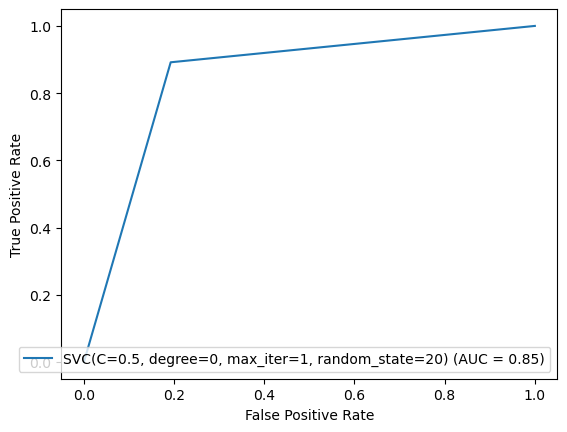

In [152]:
# ROC curve
a, b, thresholds = metrics.roc_curve(y_ver, pred_model)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = my_model)
display.plot()
plt.show()

In [153]:
pickle.dump(my_model, open('BANK_Romuald.pkl', 'wb'))